<a href="https://colab.research.google.com/github/OmarK920/Data-Science-Projects/blob/main/Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv('/content/insurance.csv')
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


**Basic Data Information**

In [6]:
#Here we are looking at the basic data Information like and we are also checking for null values
def check_data(dataframe,head=5):
    print(20*"-" + "Information".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(dataframe.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    print(dataframe.tail())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(dataframe.describe().T)
check_data(df)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
--------------------     Data Shape     --------------------
(1338, 7)

--------------------  The First 5 Data  --------------------
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705   

**Check Null values , Outliers and Duplicates**

In [7]:
#here we are checking for missing values, we found that there are no missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Exploring Outliers**

In [8]:
# check for outliers

#As we can see, the charges column have outliers.
#For example, the max charges is 63770.428010 while its mean is 13270.422265. The mean is sensitive to outliers,
#but the fact the mean is so small compared to the max value indicates the max value is an outlier
df.describe()[['bmi', 'charges' , 'age']]



,bmi,charges,age
count,1338.000000,1338.000000,1338.000000
mean,30.663397,13270.422265,39.207025
std,6.098187,12110.011237,14.049960
min,15.960000,1121.873900,18.000000
25%,26.296250,4740.287150,27.000000
50%,30.400000,9382.033000,39.000000
75%,34.693750,16639.912515,51.000000
max,53.130000,63770.428010,64.000000


In [10]:
#this method is used to check for outliers , since the diffrence between mean and max number in the 'bmi' column
#is relativley low so the number of outliers is not that much
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(df['bmi'])

Outliers: [49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13]


In [14]:
#here for example there are no outliers in the age column

out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(df['age'])

Outliers: []


In [12]:
#this method is used to check for outliers , since the diffrence between mean and max number in the 'charges' column
#is igh so the number of outliers is alot
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(df['charges'])

Outliers: [39611.7577, 36837.467, 37701.8768, 38711.0, 35585.576, 51194.55914, 39774.2763, 48173.361, 38709.176, 37742.5757, 47496.49445, 37165.1638, 39836.519, 43578.9394, 47291.055, 47055.5321, 39556.4945, 40720.55105, 36950.2567, 36149.4835, 48824.45, 43753.33705, 37133.8982, 34779.615, 38511.6283, 35160.13457, 47305.305, 44260.7499, 41097.16175, 43921.1837, 36219.40545, 46151.1245, 42856.838, 48549.17835, 47896.79135, 42112.2356, 38746.3551, 42124.5153, 34838.873, 35491.64, 42760.5022, 47928.03, 48517.56315, 41919.097, 36085.219, 38126.2465, 42303.69215, 46889.2612, 46599.1084, 39125.33225, 37079.372, 35147.52848, 48885.13561, 36197.699, 38245.59327, 48675.5177, 63770.42801, 45863.205, 39983.42595, 45702.02235, 58571.07448, 43943.8761, 39241.442, 42969.8527, 40182.246, 34617.84065, 42983.4585, 42560.4304, 40003.33225, 45710.20785, 46200.9851, 46130.5265, 40103.89, 34806.4677, 40273.6455, 44400.4064, 40932.4295, 40419.0191, 36189.1017, 44585.45587, 43254.41795, 36307.7983, 38792.685

**Boxplots Before Outlier Handling**

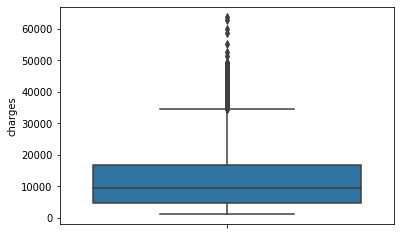

In [13]:
sns.boxplot(y = df.charges)


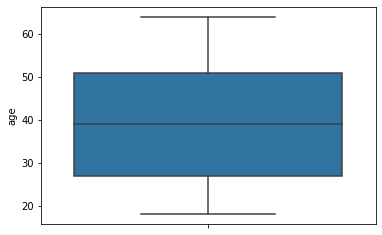

In [15]:
sns.boxplot(y = df.age)


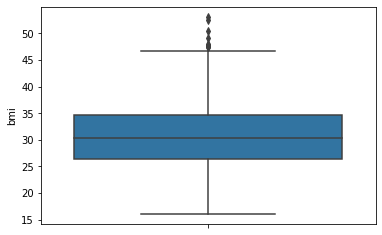

In [16]:
sns.boxplot(y = df.bmi)


In [18]:
#another method that shows the number of outliers 
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [19]:
out_iqr(df,'bmi')


The IQR is 8.3975
The lower bound value is 13.7
The upper bound value is 47.290000000000006
Total number of outliers are 9


In [20]:
out_iqr(df,'charges')


The IQR is 11899.625365
The lower bound value is -13109.1508975
The upper bound value is 34489.350562499996
Total number of outliers are 139


**Handling Outliers**

In [22]:
#here iam using the Trimming technique which is removing the rows that have outliers  
#i use this method when the number of outliers is not that large and the dataset is a large one 
IQR = df['bmi'].quantile(0.75) - df['bmi'].quantile(0.25)

lower = df['bmi'].quantile(0.25) - 1.5* IQR
upper = df['bmi'].quantile(0.75) + 1.5* IQR

outliers = np.where(df['bmi']>upper,True, np.where(df['bmi']<lower,True,False))

df = df.loc[~(outliers)]

In [23]:
#we see that the number of outliers is 0
out_iqr(df,'bmi')


The IQR is 8.265
The lower bound value is 13.822499999999998
The upper bound value is 46.8825
Total number of outliers are 0


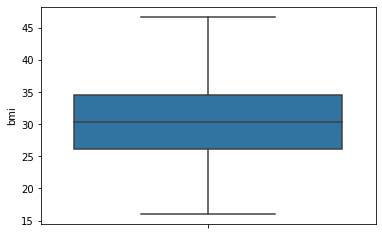

In [24]:
#here the box plot after outlier handling shows no outliers 
sns.boxplot(y = df.bmi)


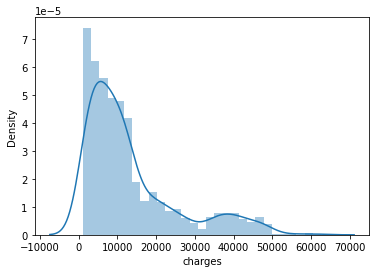

In [27]:
#before capping
sns.distplot(df['charges'])


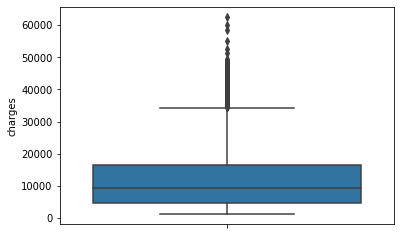

In [28]:
#before capping
sns.boxplot(y = df.charges)


**Capping the charges column using IQR**

In [29]:
percentile25 = df['charges'].quantile(0.25)
percentile75 = df['charges'].quantile(0.75)

IQR = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR


In [30]:
df[df['charges'] > upper_limit]
df[df['charges'] < lower_limit]

,age,sex,bmi,children,smoker,region,charges


In [32]:
new_df = df[df['charges'] < upper_limit]
new_df.shape

(1191, 7)

In [42]:
df = new_df

**End of Capping**

In [ ]:
#######################################################

In [41]:
#the number of outliers has decresed by more thgan half after capping
out_iqr(new_df,'charges')


The IQR is 8544.8987
The lower bound value is -8408.65215
The upper bound value is 25770.94265
Total number of outliers are 53


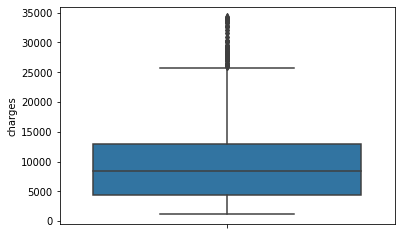

In [40]:
#after capping the mean has changed an
sns.boxplot(y = new_df.charges)


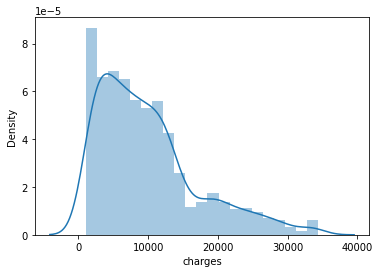

In [38]:
sns.distplot(new_df['charges'])


**Data Visualization**

In [45]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


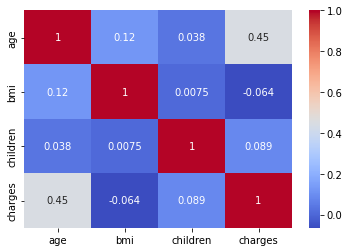

In [47]:
corr = df.corr()
sns.heatmap(corr , annot = True , cmap = 'coolwarm')

**Univariate Visualizations**

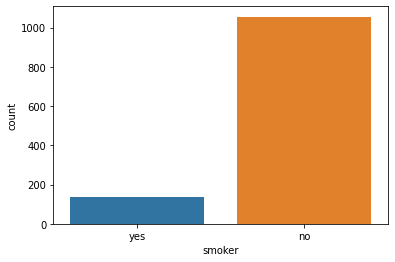

In [48]:
sns.countplot(df['smoker'])

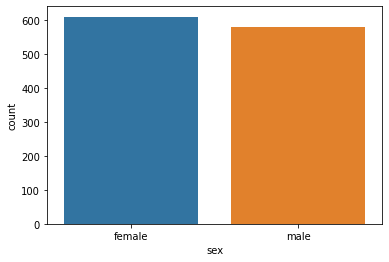

In [52]:
sns.countplot(df['sex'])

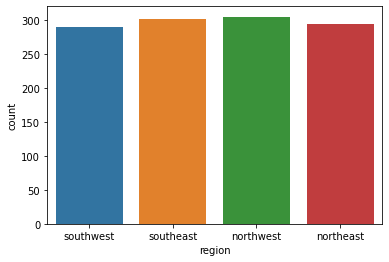

In [53]:
sns.countplot(df['region'])

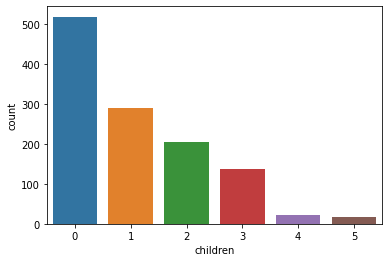

In [54]:
sns.countplot(df['children'])

**Multivariable visualizations**

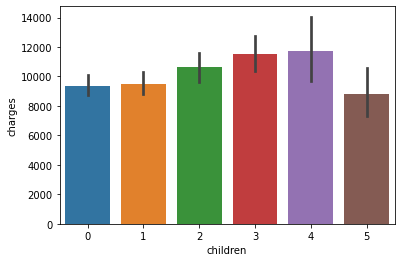

In [51]:
#does the number of children affect the charges that are charged by insuracnce companies
#and as a result yes , the charges do change given the number of children 
#where 0 or 1 child have same charges but after 1 child the charges increase 
sns.barplot(data=df, x="children", y="charges")

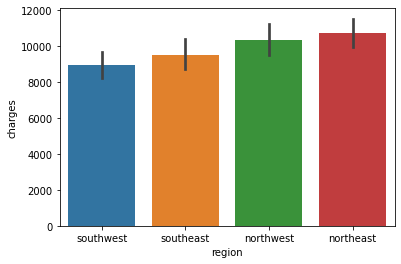

In [57]:
#here  i was tryng to explore whether the diffrent regions across the US have diffrent 
#insurance prices and yes each region has diffrent prices 
sns.barplot(data=df, x="region", y="charges")

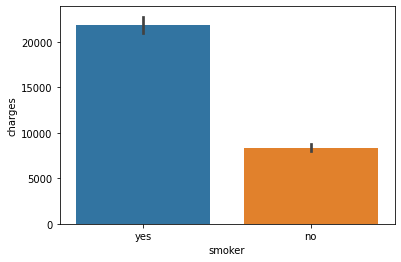

In [58]:
#here i was trying to explore whether smokers are charged more than non-smokers or not 
#and the results show a signficant diffrence between the prices charged between smokers and non-smokers
sns.barplot(data=df, x="smoker", y="charges")

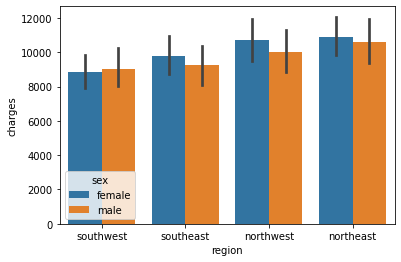

In [61]:
#here i was trying to identify the relationship between the diffrent genders and there region
#and how much they are charged  , and it is found that females are charged more than males
sns.barplot(x='region', y='charges', hue='sex', data=df)


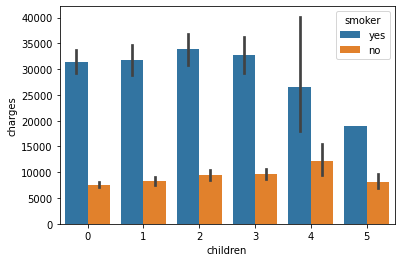

In [64]:

sns.barplot(x='children', y='charges', hue='smoker', data=df)

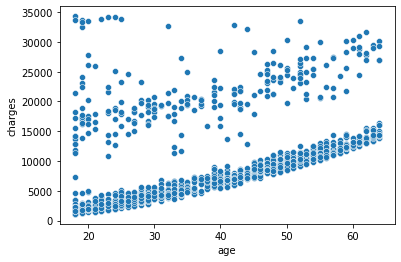

In [59]:
sns.scatterplot(data=df, x="age", y="charges")


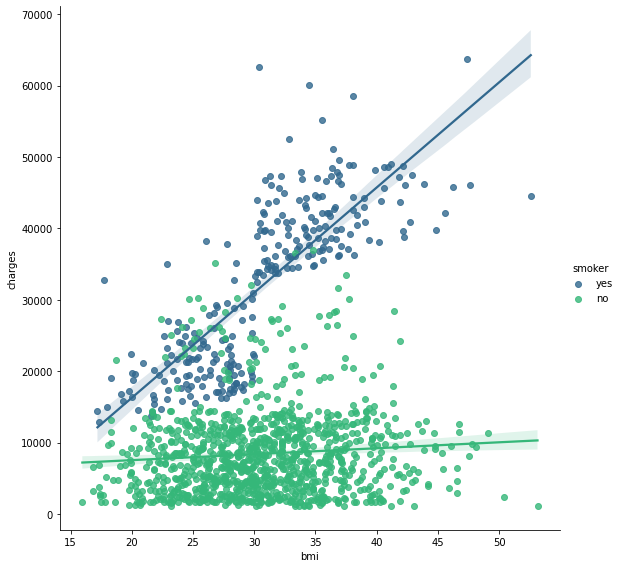

In [63]:

sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'viridis', size = 8)


**Data Encoding**

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [70]:
df['smoker'] = le.fit_transform(df['smoker'])
df['sex'] = le.fit_transform(df['sex'])
df['region'] = le.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


**Machine Learning Model**

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [72]:
X = df.drop(['charges'], axis = 1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [81]:
linear_model = LinearRegression().fit(X_train, y_train)

In [82]:
lr_predictions = linear_model.predict(X_test)
lr_score = linear_model.score(X_test, y_test)
print("\nLinear Regression R2 Score: ", lr_score * 100)


Linear Regression R2 Score:  74.0367716897532


In [83]:
from sklearn.metrics import r2_score
score = r2_score(y_test, lr_predictions)#score = r2_score(data["Actual Value"], data["Preds"])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 74.0%
